# Segunda Atividade

Luciano Gonçalves Lopes Filho, 13676520

Marcelo Eduardo Reginato, 13676965

Marco Antonio Gaspar Garcia, 11833581

## Bibliotecas Utilizadas

In [40]:
import numpy as np
import time
import matplotlib.pyplot as plt

![Screenshot 2023-05-10 at 09.06.06.png](<attachment:Screenshot 2023-05-10 at 09.06.06.png>)
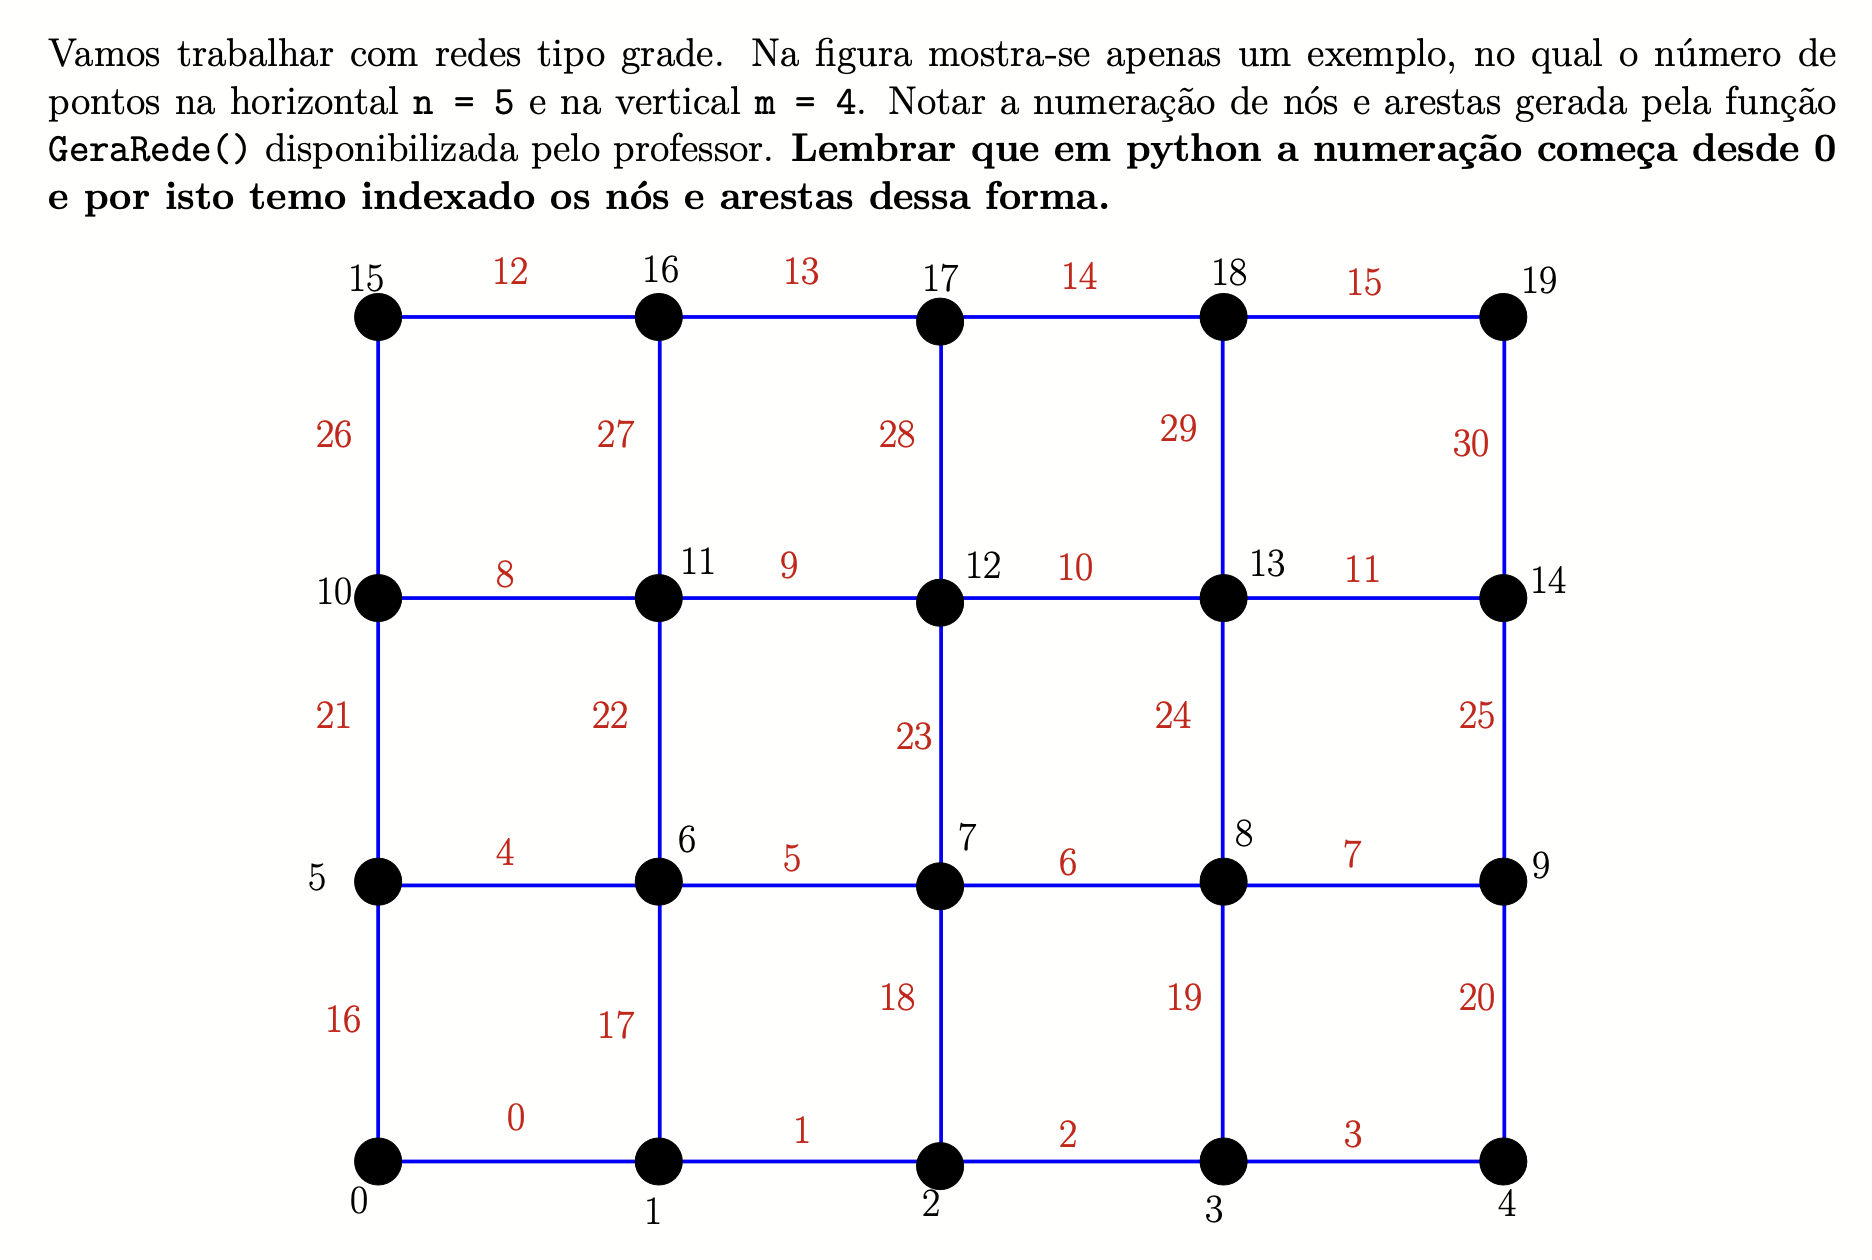

In [41]:
# Função para criar uma rede hidráulica com forma de grade retangular

# n == numero de linhas
# m == numero de colunas
# CH == Condutância Horizontal
# CV == Condutância Vertical
def GeraRede (n, m, CH, CV):
    
    nN = n * m              # número de nós
    nC = (n-1)*m + (m-1)*n  # número de canos

    coord = np.zeros(shape=(nN, 2))  # matriz de coordenadas para a plotagem dos nós

    for i in range (n):
        for j in range (m):
            k = i + j*n
            coord[k,0] = i
            coord[k,1] = j # gera uma matriz com todas as coordenadas quadradas, n x m

    # Matriz que informa as conexões
    conec = np.zeros(shape=(nC,2), dtype=int)

    # Vetor de condutâncias
    C = np.zeros(nC, dtype=float)

    # Loop sobre canos horizontais
    for j in range (m):
        for i in range (n-1):
            k = j*(n-1) + i
            conec[k,0] = j*n + i
            conec[k,1] = j*n + i+1
            C[k] = CH
    # Estabelece as conexões horizontais e associa a condutância a elas
    
    # Loop sobre canos verticais
    for i in range(n):
        for j in range(m-1):
            k = (n-1)*m + j*n + i
            conec[k,0] = i + j*n
            conec[k,1] = i + (j+1)*n
            C[k] = CV
    # Estabelece as conexões verticais e associa a condutância a elas
    
    return nN, nC, C, conec, coord

# Exercício A
![Screenshot 2023-05-04 at 21.32.34.png](<attachment:Screenshot 2023-05-04 at 21.32.34.png>)
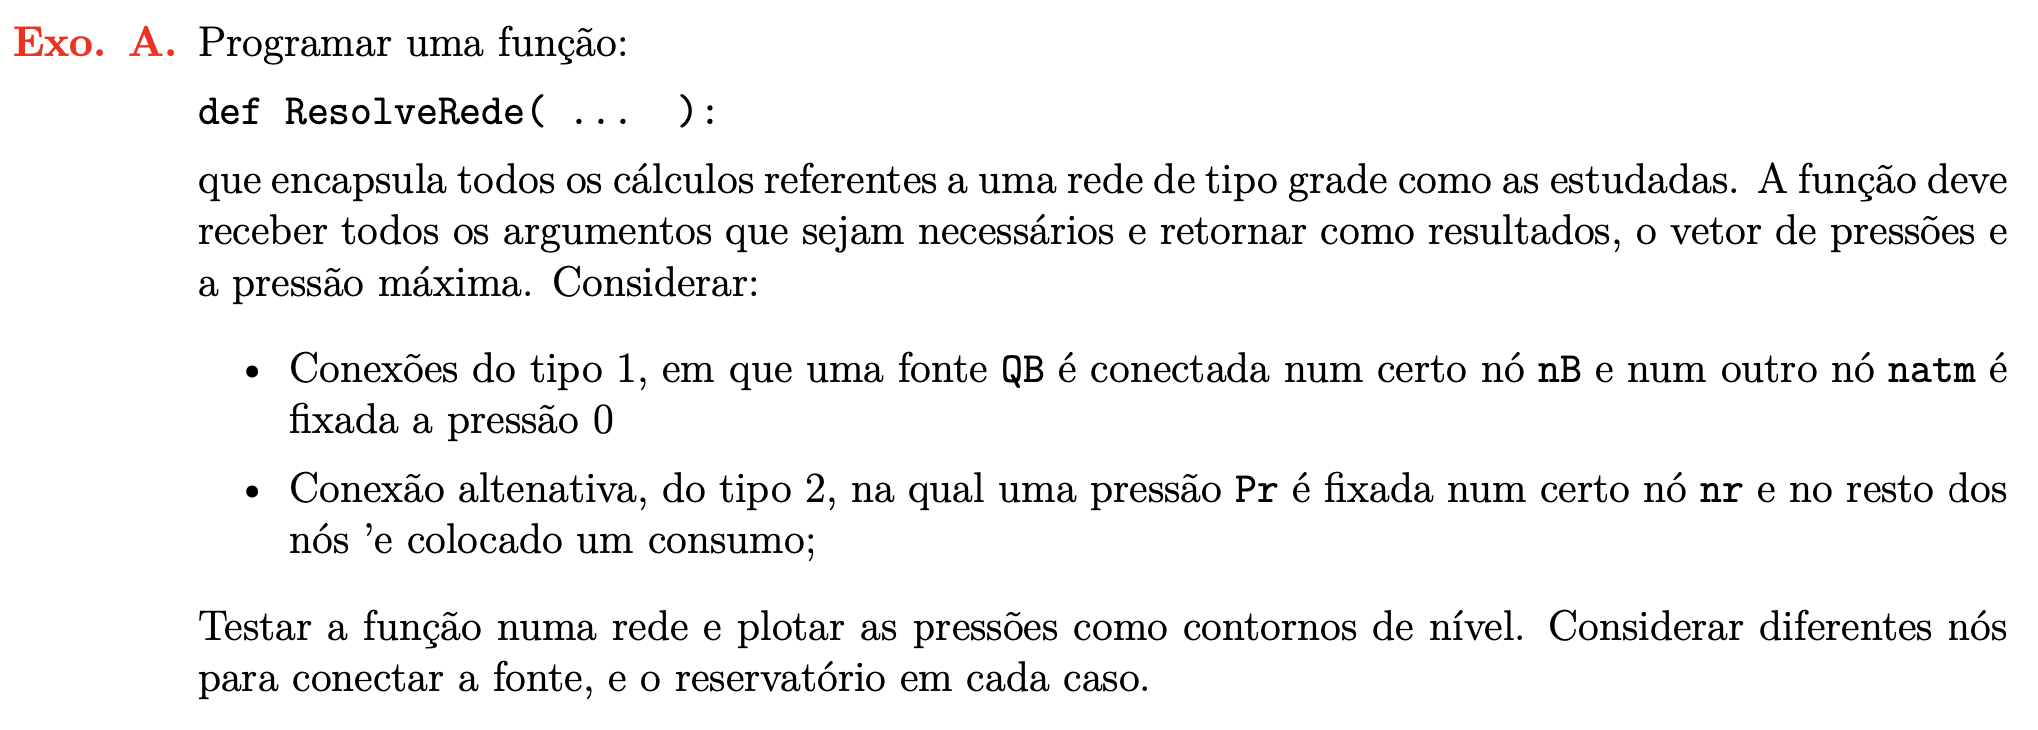

In [42]:
# funcao que monta a matriz global do sistema de equacoes
def Assembly (nN, nC, C, conec):

    # matriz quadrada dos coeficientes
    A = np.zeros(shape=(nN,nN))

    for k in range (nC):
        Coef = np.array([ [ C[k], -C[k] ], [ -C[k], C[k] ] ])
        p = conec[k,0]
        q = conec[k,1]
        A[p,p] += Coef[0,0]
        A[q,q] += Coef[1,1]
        A[p,q] += Coef[0,1]
        A[q,p] += Coef[1,0] 
    
    return A
    
# nAtm: a pressao neste nó vale zero, conectada a atmosfera
# nB é o nó que chega uma vazão igual a QB (bomba)
def ResolveRede1 (nN, nC, C, conec, nAtm, nB, QB):

    # Montando a matriz
    A = Assembly(nN, nC, C, conec)

    # Deep Copy
    Copia = np.copy(A)
    Copia[nAtm,:] = 0.0     # zera a linha do nAtm
    Copia[nAtm,nAtm] = 1.0  # pressao atm = 0

    B = np.zeros(nN, dtype=float)  
    B[nB] = QB

    pressoes = np.linalg.solve(Copia, B)

    return pressoes, np.max(pressoes)

# nr: A pressão neste nó vale Pr
def ResolveRede2 (nN, nC, C, conec, nr, Pr):

    # Montando a matriz
    A = Assembly(nN, nC, C, conec)

    # Deep Copy
    Copia = np.copy(A)
    Copia[nr,:] = 0.0
    Copia[nr,nr] = 1.0
    
    B = -0.1*np.ones(nN, dtype=float)
    B[nr] = Pr

    pressoes = np.linalg.solve(Copia, B)

    return pressoes, np.max(pressoes)

# Funcao que Plota a rede hidráulica
def PlotaRede(conec, coord):

    fig, ax = plt.subplots()
    nC = conec.shape[0]
    temp = np.zeros((2,2))

    for i in range(nC):
        temp[0,:] = coord[conec[i,0],0], coord[conec[i,0],1]
        temp[1,:] = coord[conec[i,1],0], coord[conec[i,1],1]
        linecolor = '-ob'
        ax.plot(temp[:,0], temp[:,1], linecolor, linewidth=1.0)
    
    ax.set_aspect('equal')
    ax.set(xlabel='x', ylabel='y', title='Hydraulic Network')
    plt.show()
    
    return

# Funcao que plota os contornos de nível das pressoes
def PlotPressure(n, m, pressure):
    x = np.arange(0, n, 1)
    y = np.arange(0, m, 1)
    X,Y = np.meshgrid(x,y)
    Z = np.copy(pressure)
    Z.shape = (m,n)
    fig, ax = plt.subplots(figsize=(7,7))
    ax.set_aspect('equal')
    ax.set(xlabel='x', ylabel='y', title='Countours of Pressure')
    ax.grid()
    '''
    ax.set_xticks(x)
    ax.set_yticks(y)
    '''
    cp = plt.contourf(X, Y, Z, 15, cmap='jet')
    plt.colorbar(cp)
    plt.show()



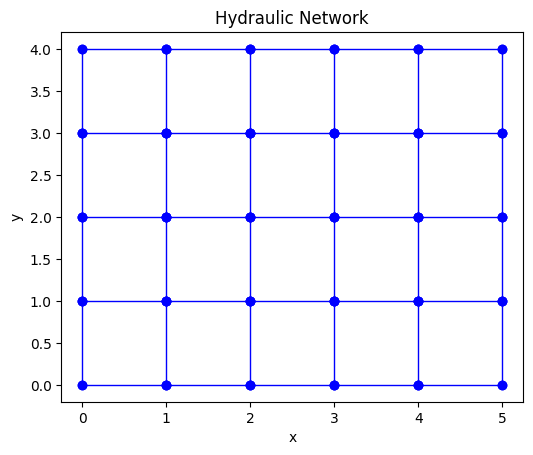

In [43]:
# definindo as dimensões e as condutâncias da rede
n, m = 6, 5
CH = 3.0
CV = 5.0

# Gerando a rede
nN, nC, C_grade, conec_grade, coord_grade = GeraRede(n, m, CH, CV)
PlotaRede(conec_grade, coord_grade)

Pressão máxima: 1.22116439665467


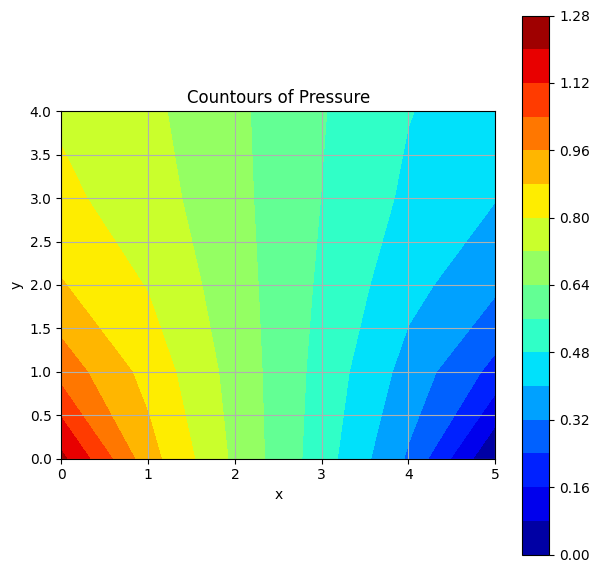

In [44]:
# ------ Resolvendo Rede, Exemplo 1 ------ #

# Conexão do tipo 1
nAtm = 6-1
nB = 1-1
QB = 2.0

# Resolvendo a rede
pressoes, pMax = ResolveRede1(nN, nC, C_grade, conec_grade, nAtm, nB, QB)
print("Pressão máxima:", pMax)

PlotPressure(n, m, pressoes)

Pressão máxima: 12.000000000000014


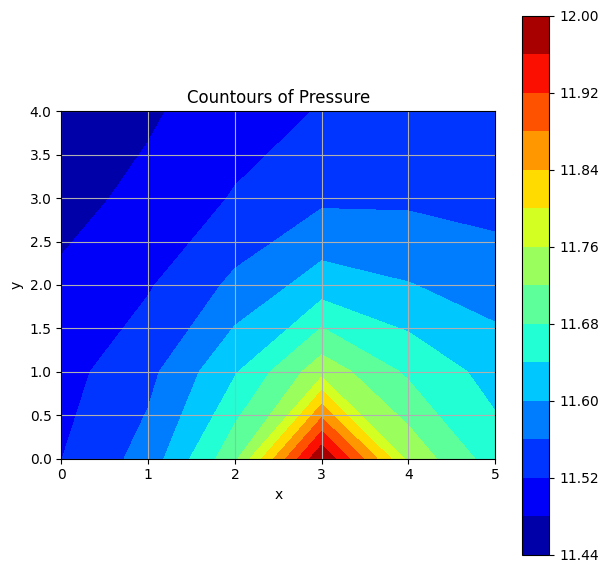

In [45]:
# ------ Resolvendo Rede, Exemplo 2 ------ #

# Conexão do tipo 2
nr = 4-1
Pr = 12.0

# Resolvendo a rede
pressoes, pMax = ResolveRede2(nN, nC, C_grade, conec_grade, nr, Pr)
print("Pressão máxima:",pMax)

PlotPressure(n, m, pressoes)

Pressão máxima: 3.4040475190535417


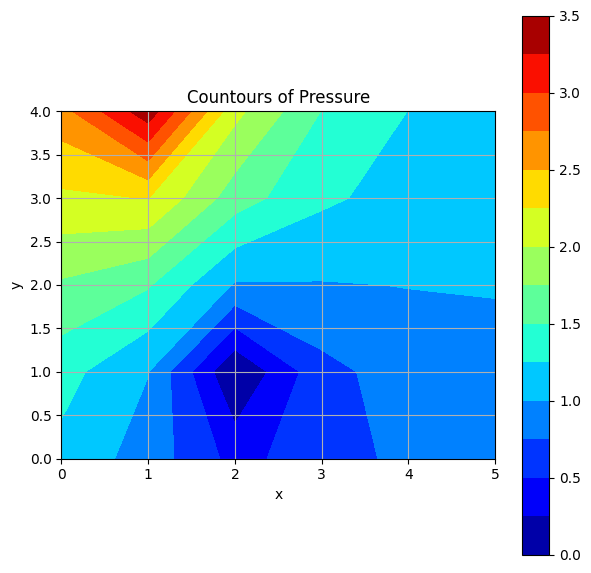

In [46]:
# ------ Resolvendo Rede, Exemplo 3 ------ #

# Conexão do tipo 1
nAtm = 9-1
nB = 26 -1
QB = 12.0

# Resolvendo a rede
pressoes, pMax = ResolveRede1(nN, nC, C_grade, conec_grade, nAtm, nB, QB)
print("Pressão máxima:",pMax)

PlotPressure(n, m, pressoes)

Pressão máxima: 8.00000000000001


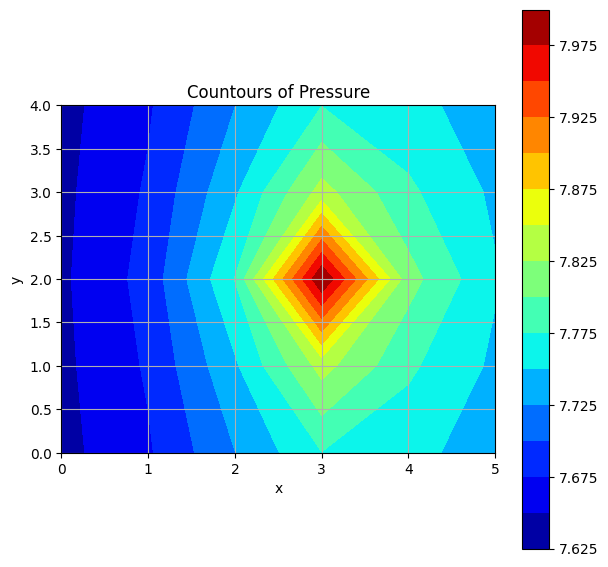

In [47]:
# ------ Resolvendo Rede, Exemplo 4 ------ #

# Conexão do tipo 2
nr = 16-1
Pr = 8.0

# Resolvendo a rede
pressoes, pMax = ResolveRede2(nN, nC, C_grade, conec_grade, nr, Pr)
print("Pressão máxima:",pMax)

PlotPressure(n, m, pressoes)

# Exercício B
![Screenshot 2023-05-06 at 21.16.40.png](<attachment:Screenshot 2023-05-06 at 21.16.40.png>)
![Screenshot 2023-05-06 at 21.16.49.png](<attachment:Screenshot 2023-05-06 at 21.16.49.png>)
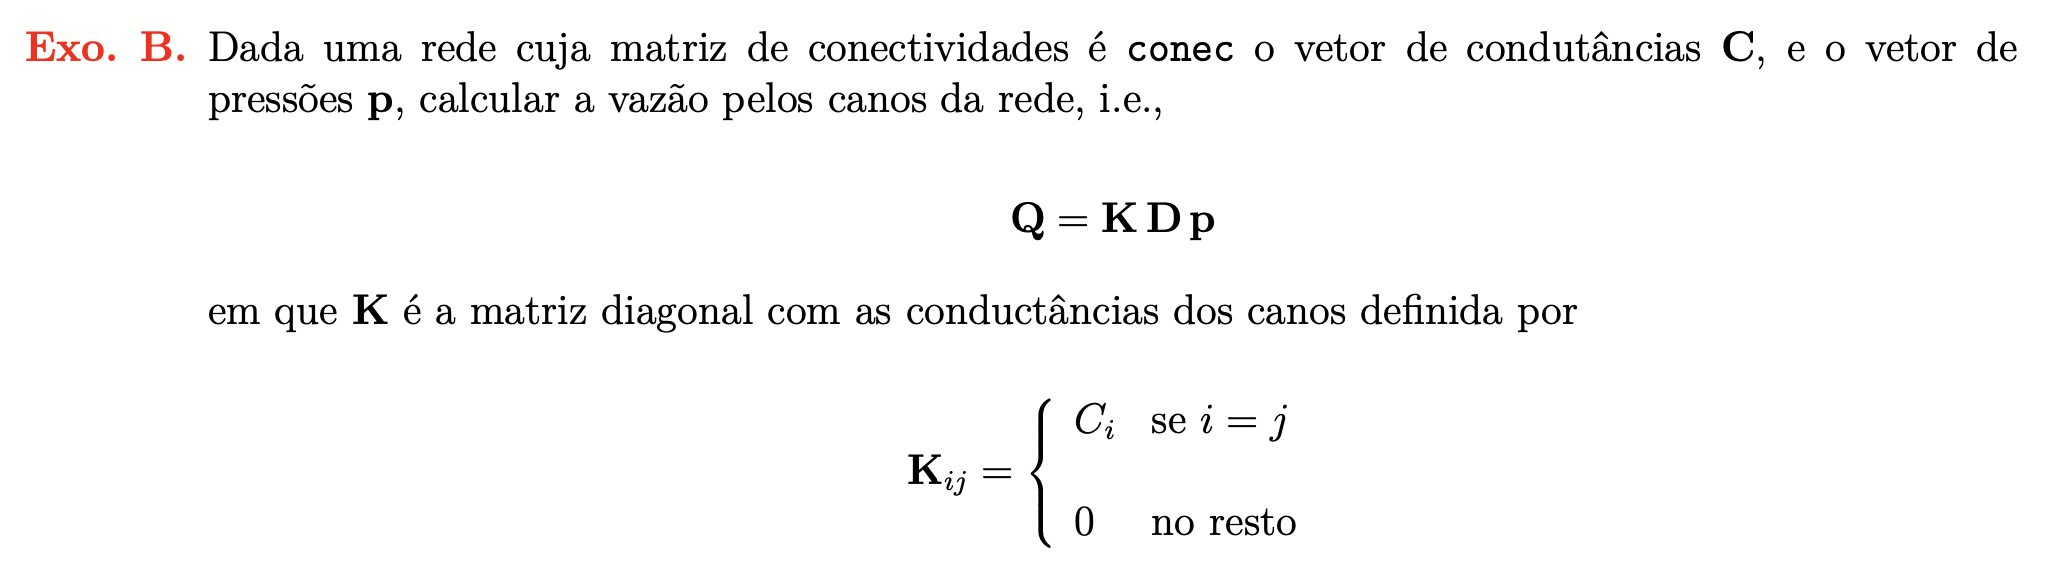
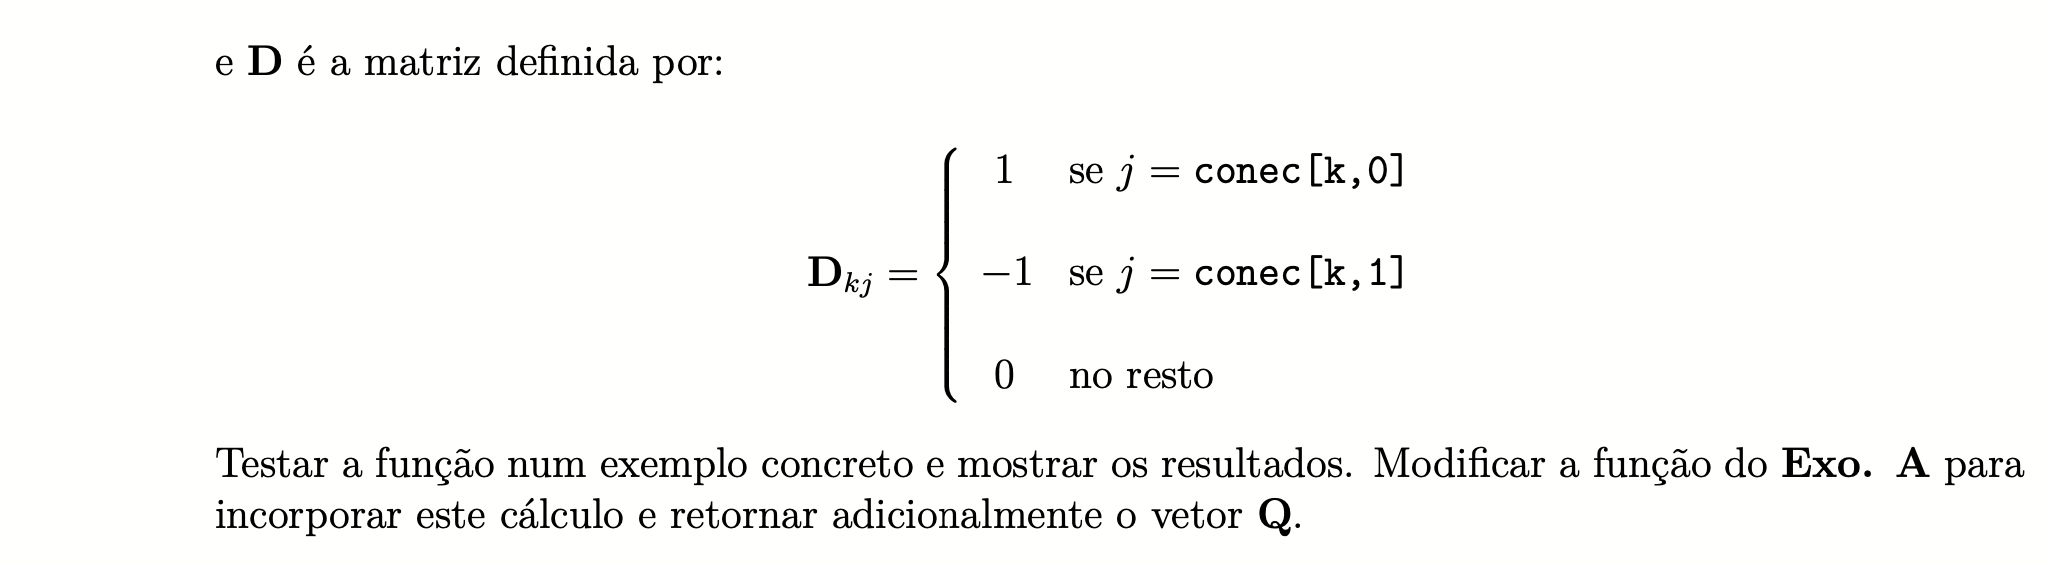

In [48]:
# Função que constrói K
def ConstroiMatrizK(nC, C):

    K = np.zeros(shape=(nC,nC))
    
    for i in range(nC) :
    
        K[i,i] = C[i]

    return K

# Funcao que constroi D
def ConstroiMatrizD(nN, nC, conec):

    D = np.zeros(shape=(nC,nN))

    for k in range(nC) :
        for j in range(nN) :

            if j == conec[k,0] :
                D[k,j] = 1

            elif j == conec[k,1] :
                D[k,j] = -1

    return D

# Funcao que retorna o vetor de vazões
def ResolveVazaoQ(nN, nC, C, conec, p):

    K = ConstroiMatrizK(nC, C)
    D = ConstroiMatrizD(nN, nC, conec)

    return K @ D @ p

# Modificando a função do Exo. A para abarcar as necessidades do Exo. B
def ResolveRedeB(nN, nC, C, conec, nAtm, nB, QB):
    
    A = Assembly(nN, nC, C, conec)
    Copia = np.copy(A)

    Copia[nAtm,:] = 0.0
    Copia[nAtm,nAtm] = 1.0

    B = np.zeros(nN, dtype=float)
    B[nB] = QB

    pressure = np.linalg.solve(Copia, B)
    pMax = np.max(pressure)

    Q = ResolveVazaoQ(nN, nC, C, conec, pressure)

    return pressure, pMax, Q

In [49]:
# Será utilizada a mesma rede gerada no Exercício A

# definindo parâmetros (Exemplo 1)
nAtm = 5
nB = 0
QB = 2.0

# Resolvendo
pressoes, pMax, Q = ResolveRedeB(nN, nC, C_grade, conec_grade, nAtm, nB, QB)

# Q = KDp
# K: nC x nC
# D: nC x nN
# p: nN x 1
# portanto: Q tem dimensão nC x 1

print("Vetor de Pressões:\n", pressoes)
print("\n")
print("Pressão Máxima:", pMax)
print("\n")
print("Vetor de Vazões:\n", Q)

Vetor de Pressões:
 [1.22116440e+00 9.11939571e-01 7.03450189e-01 5.17714208e-01
 3.09224826e-01 4.55191440e-16 1.00669929e+00 8.51498305e-01
 6.89798149e-01 5.31366248e-01 3.69666092e-01 2.14465105e-01
 8.85354780e-01 7.94956539e-01 6.74185155e-01 5.46979241e-01
 4.26207857e-01 3.35809617e-01 8.18249213e-01 7.56638660e-01
 6.62432879e-01 5.58731517e-01 4.64525737e-01 4.02915184e-01
 7.88109977e-01 7.37877917e-01 6.56377953e-01 5.64786444e-01
 4.83286480e-01 4.33054420e-01]


Pressão Máxima: 1.22116439665467


Vetor de Vazões:
 [ 0.92767448  0.62546815  0.55720794  0.62546815  0.92767448  0.46560296
  0.48510047  0.4752957   0.48510047  0.46560296  0.27119472  0.36231415
  0.38161774  0.36231415  0.27119472  0.18483166  0.28261734  0.31110409
  0.28261734  0.18483166  0.15069618  0.24449989  0.27477453  0.24449989
  0.15069618  1.07232552  0.30220633  0.0682602  -0.0682602  -0.30220633
 -1.07232552  0.60672256  0.28270883  0.07806497 -0.07806497 -0.28270883
 -0.60672256  0.33552784  0.

# Exercício C
![Screenshot 2023-05-06 at 21.20.02.png](<attachment:Screenshot 2023-05-06 at 21.20.02.png>)
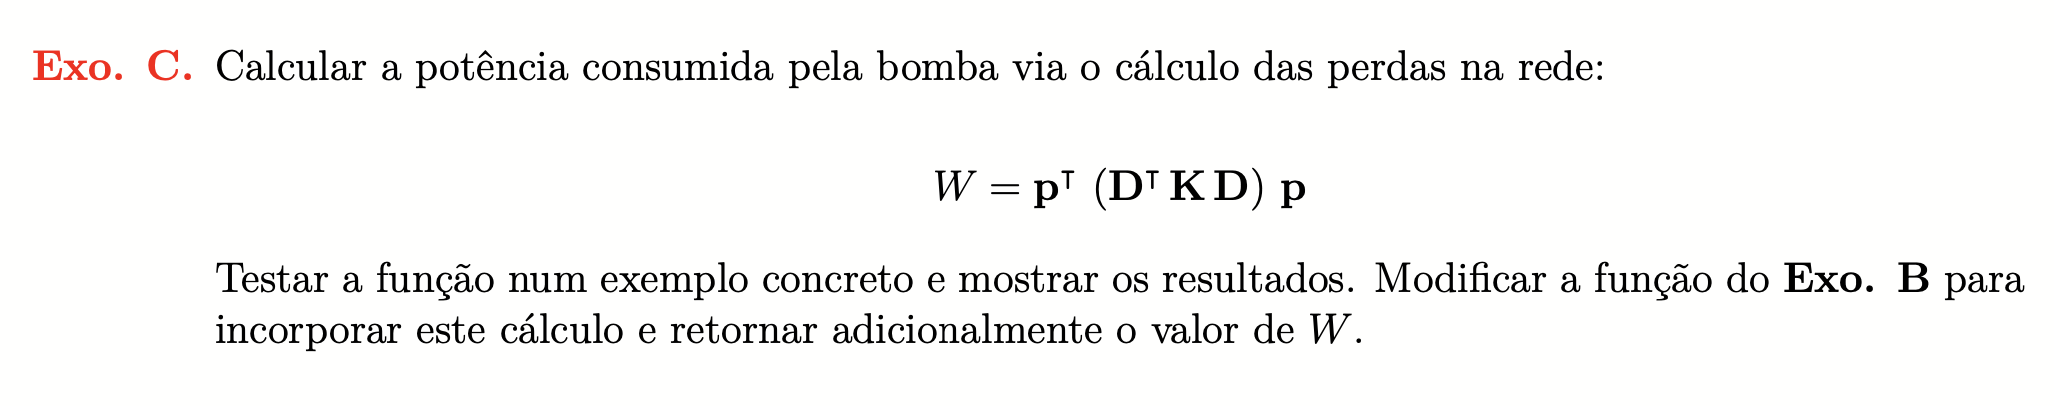

In [50]:
# pˆt é a matriz transposta de p
# Dˆt é a matriz transposta de D

# Funcao que calcula a potencia consumida pela bomba (W é escalar)
def PotenciaBomba(p, D, K):

    pt = np.transpose(p)
    Dt = np.transpose(D)

    W = pt @ (Dt @ K @ D) @ p

    return W

# Retorna o vetor de vazoes Q e a potencia W
def ResolveQW(nN, nC, C, conec, p):

    K = ConstroiMatrizK(nC, C)
    D = ConstroiMatrizD(nN, nC, conec)
    
    Q = K @ D @ p

    W = PotenciaBomba(p, D, K)

    return Q, W

# Modificando a função do Exo. B para abarcar as necessidades do Exo. C
def ResolveRedeC(nN, nC, C, conec, nAtm, nB, QB):
    
    A = Assembly(nN, nC, C, conec)
    Copia = np.copy(A)

    Copia[nAtm,:] = 0.0
    Copia[nAtm,nAtm] = 1.0

    B = np.zeros(nN, dtype=float)
    B[nB] = QB

    pressure = np.linalg.solve(Copia, B)
    pMax = np.max(pressure)

    Q, W = ResolveQW (nN, nC, C, conec, pressure)

    return pressure, pMax, Q, W


pressoes, pMax, Q, W = ResolveRedeC(nN, nC, C_grade, conec_grade, nAtm, nB, QB)

In [51]:
# Descobrindo a dimensão da matriz W

# W = pˆt(DˆtKD)p
# pˆt: 1 x nN
# Dˆt: nN x nC
# K: nC x nC
# D: nC x nN
# p: nN x 1
# portanto: W tem dimensão 1 x 1 (escalar)

print("Pressão em cada um dos nós:\n", pressoes)
print("Pressão Máxima:", pMax)
print("Vetor de Vazões:\n", Q)
print("Potência:", W)

Pressão em cada um dos nós:
 [1.22116440e+00 9.11939571e-01 7.03450189e-01 5.17714208e-01
 3.09224826e-01 4.55191440e-16 1.00669929e+00 8.51498305e-01
 6.89798149e-01 5.31366248e-01 3.69666092e-01 2.14465105e-01
 8.85354780e-01 7.94956539e-01 6.74185155e-01 5.46979241e-01
 4.26207857e-01 3.35809617e-01 8.18249213e-01 7.56638660e-01
 6.62432879e-01 5.58731517e-01 4.64525737e-01 4.02915184e-01
 7.88109977e-01 7.37877917e-01 6.56377953e-01 5.64786444e-01
 4.83286480e-01 4.33054420e-01]
Pressão Máxima: 1.22116439665467
Vetor de Vazões:
 [ 0.92767448  0.62546815  0.55720794  0.62546815  0.92767448  0.46560296
  0.48510047  0.4752957   0.48510047  0.46560296  0.27119472  0.36231415
  0.38161774  0.36231415  0.27119472  0.18483166  0.28261734  0.31110409
  0.28261734  0.18483166  0.15069618  0.24449989  0.27477453  0.24449989
  0.15069618  1.07232552  0.30220633  0.0682602  -0.0682602  -0.30220633
 -1.07232552  0.60672256  0.28270883  0.07806497 -0.07806497 -0.28270883
 -0.60672256  0.3355278

# Exercício D
![Screenshot 2023-05-06 at 21.20.33.png](<attachment:Screenshot 2023-05-06 at 21.20.33.png>)
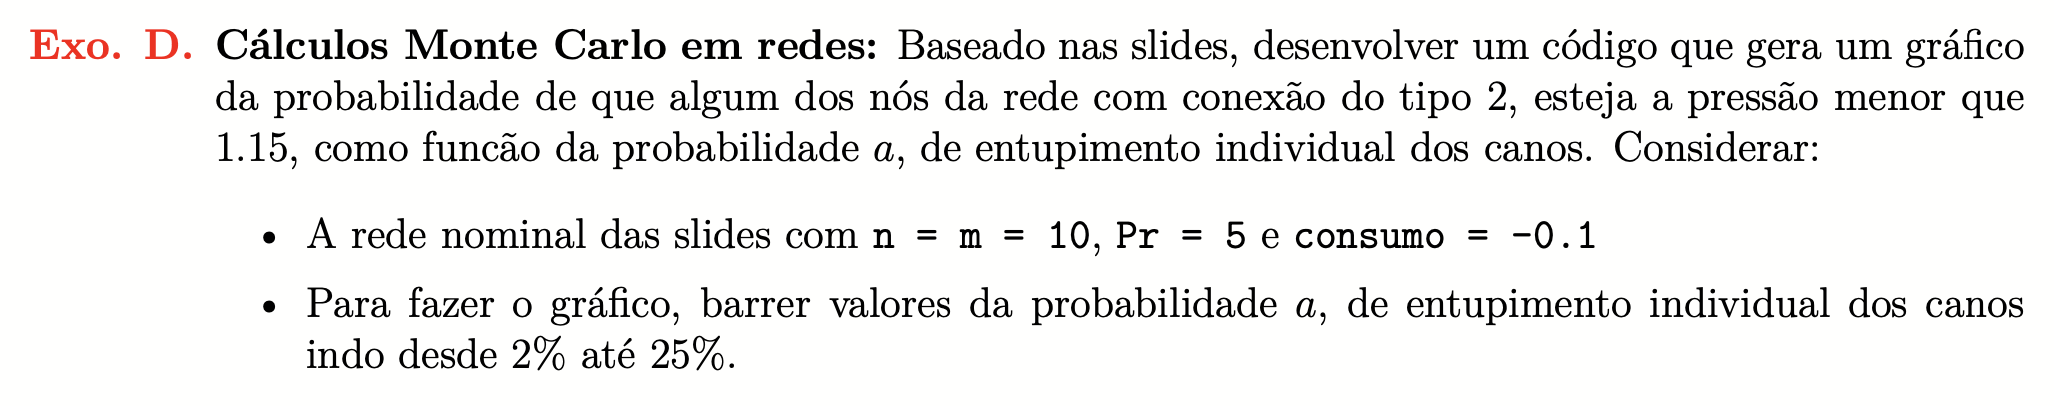

In [59]:
# Gerando uma nova Rede

CH = CV = 2.0
n = m = 10
nN, nC, C_grade, conec_grade, coord = GeraRede(n, m, CH, CV)

# Colocando canos grossos em alguns lugares
lst = [0, 1, 2, 30, 31, 32, 93, 103, 113]
C_grade[lst] = 20.0

# Definindo Parâmetros
nr = 0
Pr = 5.0
Centup = 0.2

In [53]:
# Função que entope alguns canos aleatoriamente
def RandomFailFinos(C, a, Centup):
    Cnew = np.copy(C)
    for i in range (np.shape(C)[0]):
        if C[i] == 2: # É um cano fino, portanto tem chance de entupir
            x = np.random.rand() # aleatório entre 0 e 1
            if x < a: # entupiu
                Cnew[i] = Centup # muda-se a condutância do cano

    return Cnew

In [54]:
# Monte Carlo

nrealizations = 10000

# Probabilidades individuais de entupimento
x = np.arange(2, 26, 1)
x = list(x)

# Lista de probabilidades
y = list()

for a in range(2, 26, 1):

    falhou = 0
    for i in range(nrealizations):

        Cnew = RandomFailFinos(C_grade, (a/100), Centup)
        pressure, pMax = ResolveRede2(nN, nC, Cnew, conec_grade, nr, Pr)

        if np.min(pressure) < 1.15:
            falhou += 1
        
    prob = 100*falhou/nrealizations
    y.append(prob)

    print("Probabilidade de falha para a = {}: {}%".format((a/100), prob))


Probabilidade de falha para a = 0.02: 0.0%
Probabilidade de falha para a = 0.03: 0.06%
Probabilidade de falha para a = 0.04: 0.26%
Probabilidade de falha para a = 0.05: 0.63%
Probabilidade de falha para a = 0.06: 1.65%
Probabilidade de falha para a = 0.07: 4.01%
Probabilidade de falha para a = 0.08: 7.0%
Probabilidade de falha para a = 0.09: 12.94%
Probabilidade de falha para a = 0.1: 18.74%
Probabilidade de falha para a = 0.11: 27.61%
Probabilidade de falha para a = 0.12: 37.48%
Probabilidade de falha para a = 0.13: 46.26%
Probabilidade de falha para a = 0.14: 57.15%
Probabilidade de falha para a = 0.15: 66.7%
Probabilidade de falha para a = 0.16: 73.95%
Probabilidade de falha para a = 0.17: 81.46%
Probabilidade de falha para a = 0.18: 86.81%
Probabilidade de falha para a = 0.19: 91.16%
Probabilidade de falha para a = 0.2: 93.96%
Probabilidade de falha para a = 0.21: 96.44%
Probabilidade de falha para a = 0.22: 97.59%
Probabilidade de falha para a = 0.23: 98.76%
Probabilidade de falha

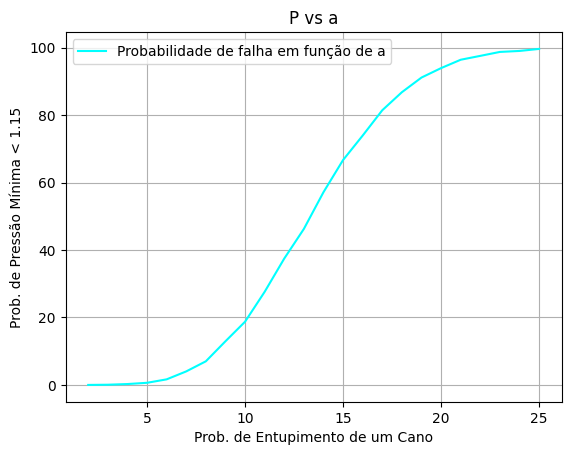

In [55]:
# Plotando o gráfico de probabilidades de algum dos nós estar a pressão menor que 1.15
plt.plot(x, y, label='Probabilidade de falha em função de a', color='cyan')

# Embelezando o Gráfico
plt.title('P vs a')
plt.xlabel('Prob. de Entupimento de um Cano')
plt.ylabel('Prob. de Pressão Mínima < 1.15')
plt.grid()
plt.legend()


plt.show()


# Exercício E

![Alt text](E.png)

_**Teorema 2.2:**_ Seja $n\geq2$ e suponha $A\in\mathbb{R}^{n\times n}$ tal que toda submatriz principal $A^k\in {R}^{k\times k}$ de ordem $k$ com $1\leq k\leq n$ é não singular. (Note que $A$ não necessariamente é não singular). Logo, $A$ pode ser fatorada na forma $A=LU$, onde $L\in\mathbb{R}^{n\times n}$ é a matriz triangular inferior, e $U\in\mathbb{R}^{n\times n}$ é triangular superior.

### Prova

Seja $A$ a seguinte matriz $2x2$

$A=
\begin{bmatrix}
a & b \\
c & d \\
\end{bmatrix}
$ , onde $a$ é a submatriz principal, logo $a\neq 0$

$L =
\begin{bmatrix}
1 & 0 \\
m & 1 \\
\end{bmatrix}
$  $U =
\begin{bmatrix}
u & v \\
0 & n \\
\end{bmatrix}
$

Como $L\cdot U = A$

$
\begin{bmatrix}
1 & 0 \\
m & 1 \\
\end{bmatrix}
$ $\cdot
\begin{bmatrix}
u & v \\
0 & n \\
\end{bmatrix}
$ $=
\begin{bmatrix}
a & b \\
c & d \\
\end{bmatrix}
$

$U = a,\,v = b,\,mu = c,\,mv+n=d$

Como $a\neq0\rightarrow u\neq0,\,m = c/u,\,n = d-mv,\,v=b$



### Prova por Indução

Seja $A\in\mathbb{R}^{n\times n}$ e $A^k\in\mathbb{R}^{k\times k}$ uma submatriz principal de $A$ (não singular)

$A=
\begin{bmatrix}
A^k & b \\
c^T & d \\
\end{bmatrix}
$ 

onde $b$ e $c$ são vetores coluna de tamanho $K$, e $d$ é um número real.

De acordo com a hipotese, A pode ser fatorada na forma $L\cdot U =A$, e $A^k =L^k\cdot U^k$

$L =
\begin{bmatrix}
L^k & 0 \\
m^T & 1 \\
\end{bmatrix}
$ e $U =
\begin{bmatrix}
U^k & v \\
0^T & n \\
\end{bmatrix}
$

 $A^k = L^k\cdot U^k$

 $
\begin{bmatrix}
A^k & b \\
c^T & d \\
\end{bmatrix}
=$ $
\begin{bmatrix}
L^k & 0 \\
m^T & 1 \\
\end{bmatrix}
$  $\cdot
\begin{bmatrix}
U^k & v \\
0^T & n \\
\end{bmatrix}
$

Pela igualdade acima, pode-se determinar

$L^kv = b$ 

$m^T+n = d$ 

$m^TV^k=c^T$

Como $L^k$ é a matriz triangular inferior, $det(L^k)=1$, logo $L^k$ é não singular.

Pelo teorema de Binet-Cauchy: 

$A^k = L^k\cdot U^K\rightarrow$ $det(A^k)=det(L^k)\cdot det(U^k)$ , como $det(L^k)=1$, logo $det(A^k) = det(U^k)$ 
$det(A^k) = det(U^k)\neq 0 $

Dessa forma, se prova a existência das matrizes $L\, e \,U$ para qualquer matriz quadrada $A\in\mathbb{R}^{n\cdot n}$

# Exercício F
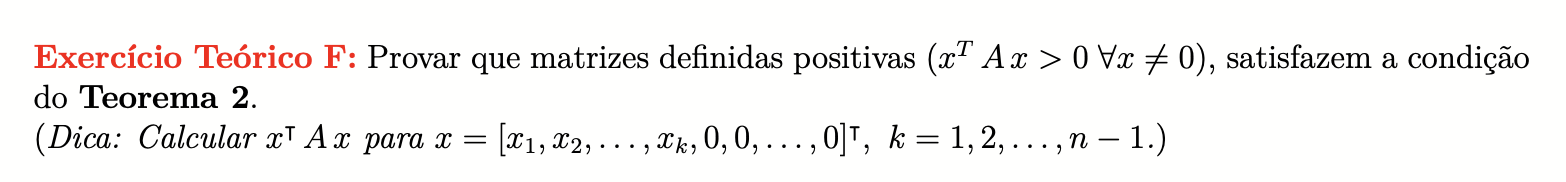

Seja $A\in\mathbb{R}^{n\times n}$ uma matriz $n\times n$ e $x\in\mathbb{R}$ um vetor qualquer de tamanho $n$.

O produto de duas matrizes será definido se o número de colunas da primeira matriz for igual ao número de linhas da segunda matriz. Se o produto for definido, a matriz resultante terá o mesmo número de linhas da primeira matriz e o mesmo número de colunas da segunda matriz.

Dessa Forma $x^T\cdot A\cdot x$ sempre vai resultar em uma matriz de dimensão $1$. Pela garantia do enunciado, $x^T\cdot A\cdot x>0\rightarrow det(x^T\cdot A\cdot x)>0$ , como a matriz definida em questão possui dimensão $1$, $x^T\cdot A\cdot x$ é a própria submatriz principal.

De acordo com o teorema, $x^T\cdot A\cdot x$ pode ser fatorada na forma 
$x^T\cdot A\cdot x = L\cdot U$

A matriz $L$ é triangular inferior $(det(U)=1)$, logo 

$det(x^T\cdot A\cdot x) = det(L)\cdot det(U)$

$det(x^T\cdot A\cdot x) = 1\cdot det(U)$

$det(x^T\cdot A\cdot x) = det(U) \neq 0$

$x^T\cdot A\cdot x = U$

Por conseguinte, matrizes definidas positivas ($x^T\cdot A\cdot x,\,\forall x>0$) satisfazem o _**Teorema 2**_.

# Exercício G
![Alt text](G.png)
![Alt text](Exerc%C3%ADcio%20G.jpeg)

# Exercício H

In [57]:
from scipy.sparse.linalg import spsolve
from scipy.linalg import solve
from scipy import sparse

# Vetores que armazenam os valores de tempo para plotagem do gráfico
tesparso, tdenso, dimensoes = [], [], []

# Gerando 10 redes quadradas de dimensoes diferentes
for i in range (10, 101, 10):

    dimensoes.append(i)

    # Montagem da Rede
    n, m = i, i
    CH, CV, 2.0, 3.0
    nN, nC, C, conec, coord = GeraRede(m, m, CH, CV)
    A = Assembly(nN, nC, C, conec)

    nr = 0
    Pr = 10

    A[nr,:] = 0.0
    A[nr,nr] = 1.0
    
    b = -0.1*np.ones(nN, dtype=float)
    b[nr] = Pr

    # Transformando a matriz em formato esparso
    Asp = sparse.csc_matrix(A)

    # Resolve e calcula o tempo esparso
    ti = time.time()
    pressure = spsolve(Asp, b)
    tesparso.append(time.time() - ti)

    # Resolve e calcula o tempo denso
    ti = time.time()
    pressure = solve(A, b)
    tdenso.append(time.time() - ti)

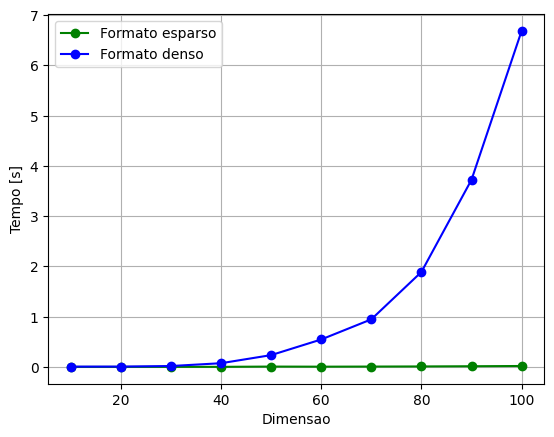

In [58]:
# Plotando o gráfico

plt.plot(dimensoes, tesparso, "-og", dimensoes, tdenso, "-ob")
plt.xlabel("Dimensao")
plt.ylabel("Tempo [s]")
plt.legend(["Formato esparso", "Formato denso"])
plt.grid()